In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [11]:
import os
from six.moves import urllib
download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col=[0])

In [12]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [13]:
df.shape

(15411, 13)

In [14]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


Exploring Data

In [20]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(f'we have {len(numeric_features)} numerical features',numeric_features)
print(f'we have {len(categorical_features)} categorical features',categorical_features)


we have 7 numerical features ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
we have 6 categorical features ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


Feature Information
- car_name: Car's Full name, which  includes brand and specific model name.
- brand: Brand Name of the particular car.
- model: Exact model name of the car of a particular brand.
- seller_type: Which Type of seller is selling the used car
- fuel_type: Fuel used in the used car, which was put up on sale.
- transmission_type: Transmission used in the used car, which was put on sale.
- vehicle_age: The count of years since car was bought.
- mileage: It is the number of kilometer the car runs per litre.
- engine: It is the engine capacity in cc(cubic centimeters)
- max_power: Max power it produces in BHP.
- seats: Total number of seats in car.
selling_price: The sale price which was put up on website.

In [21]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
---------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Min

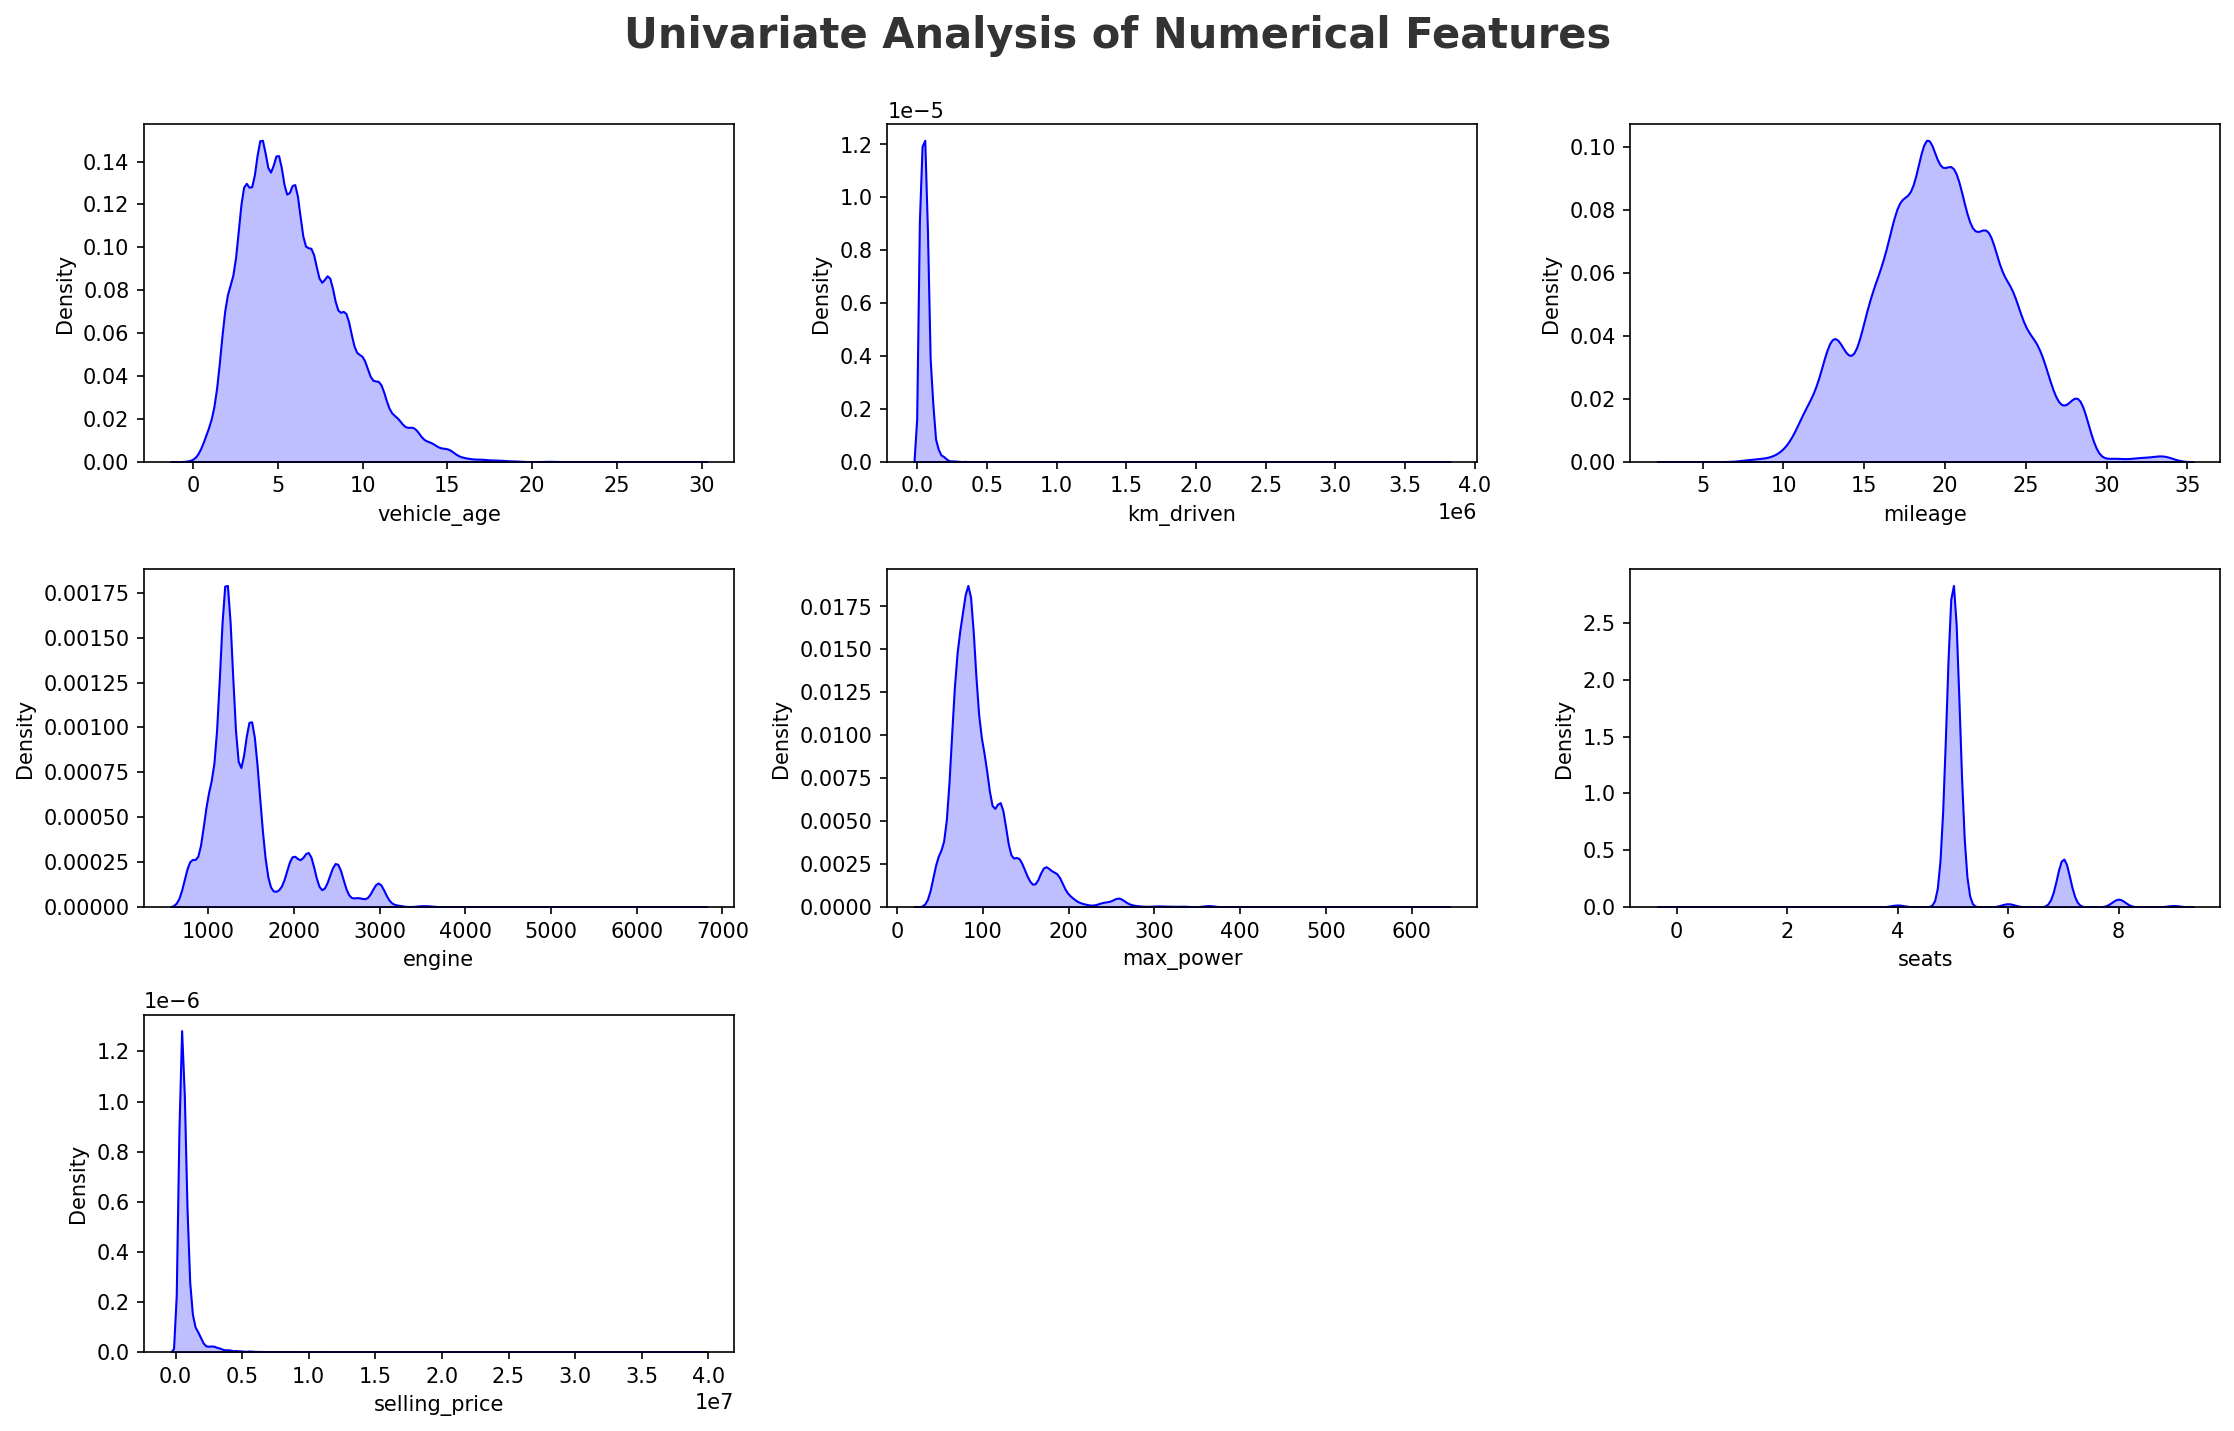

In [27]:
import seaborn as sns
plt.figure(figsize=(15, 15),dpi=150)
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Report

- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, enginer, selling_price, and max power.

In [25]:
warnings.filterwarnings("ignore")

%matplotlib inline

Categorical plot

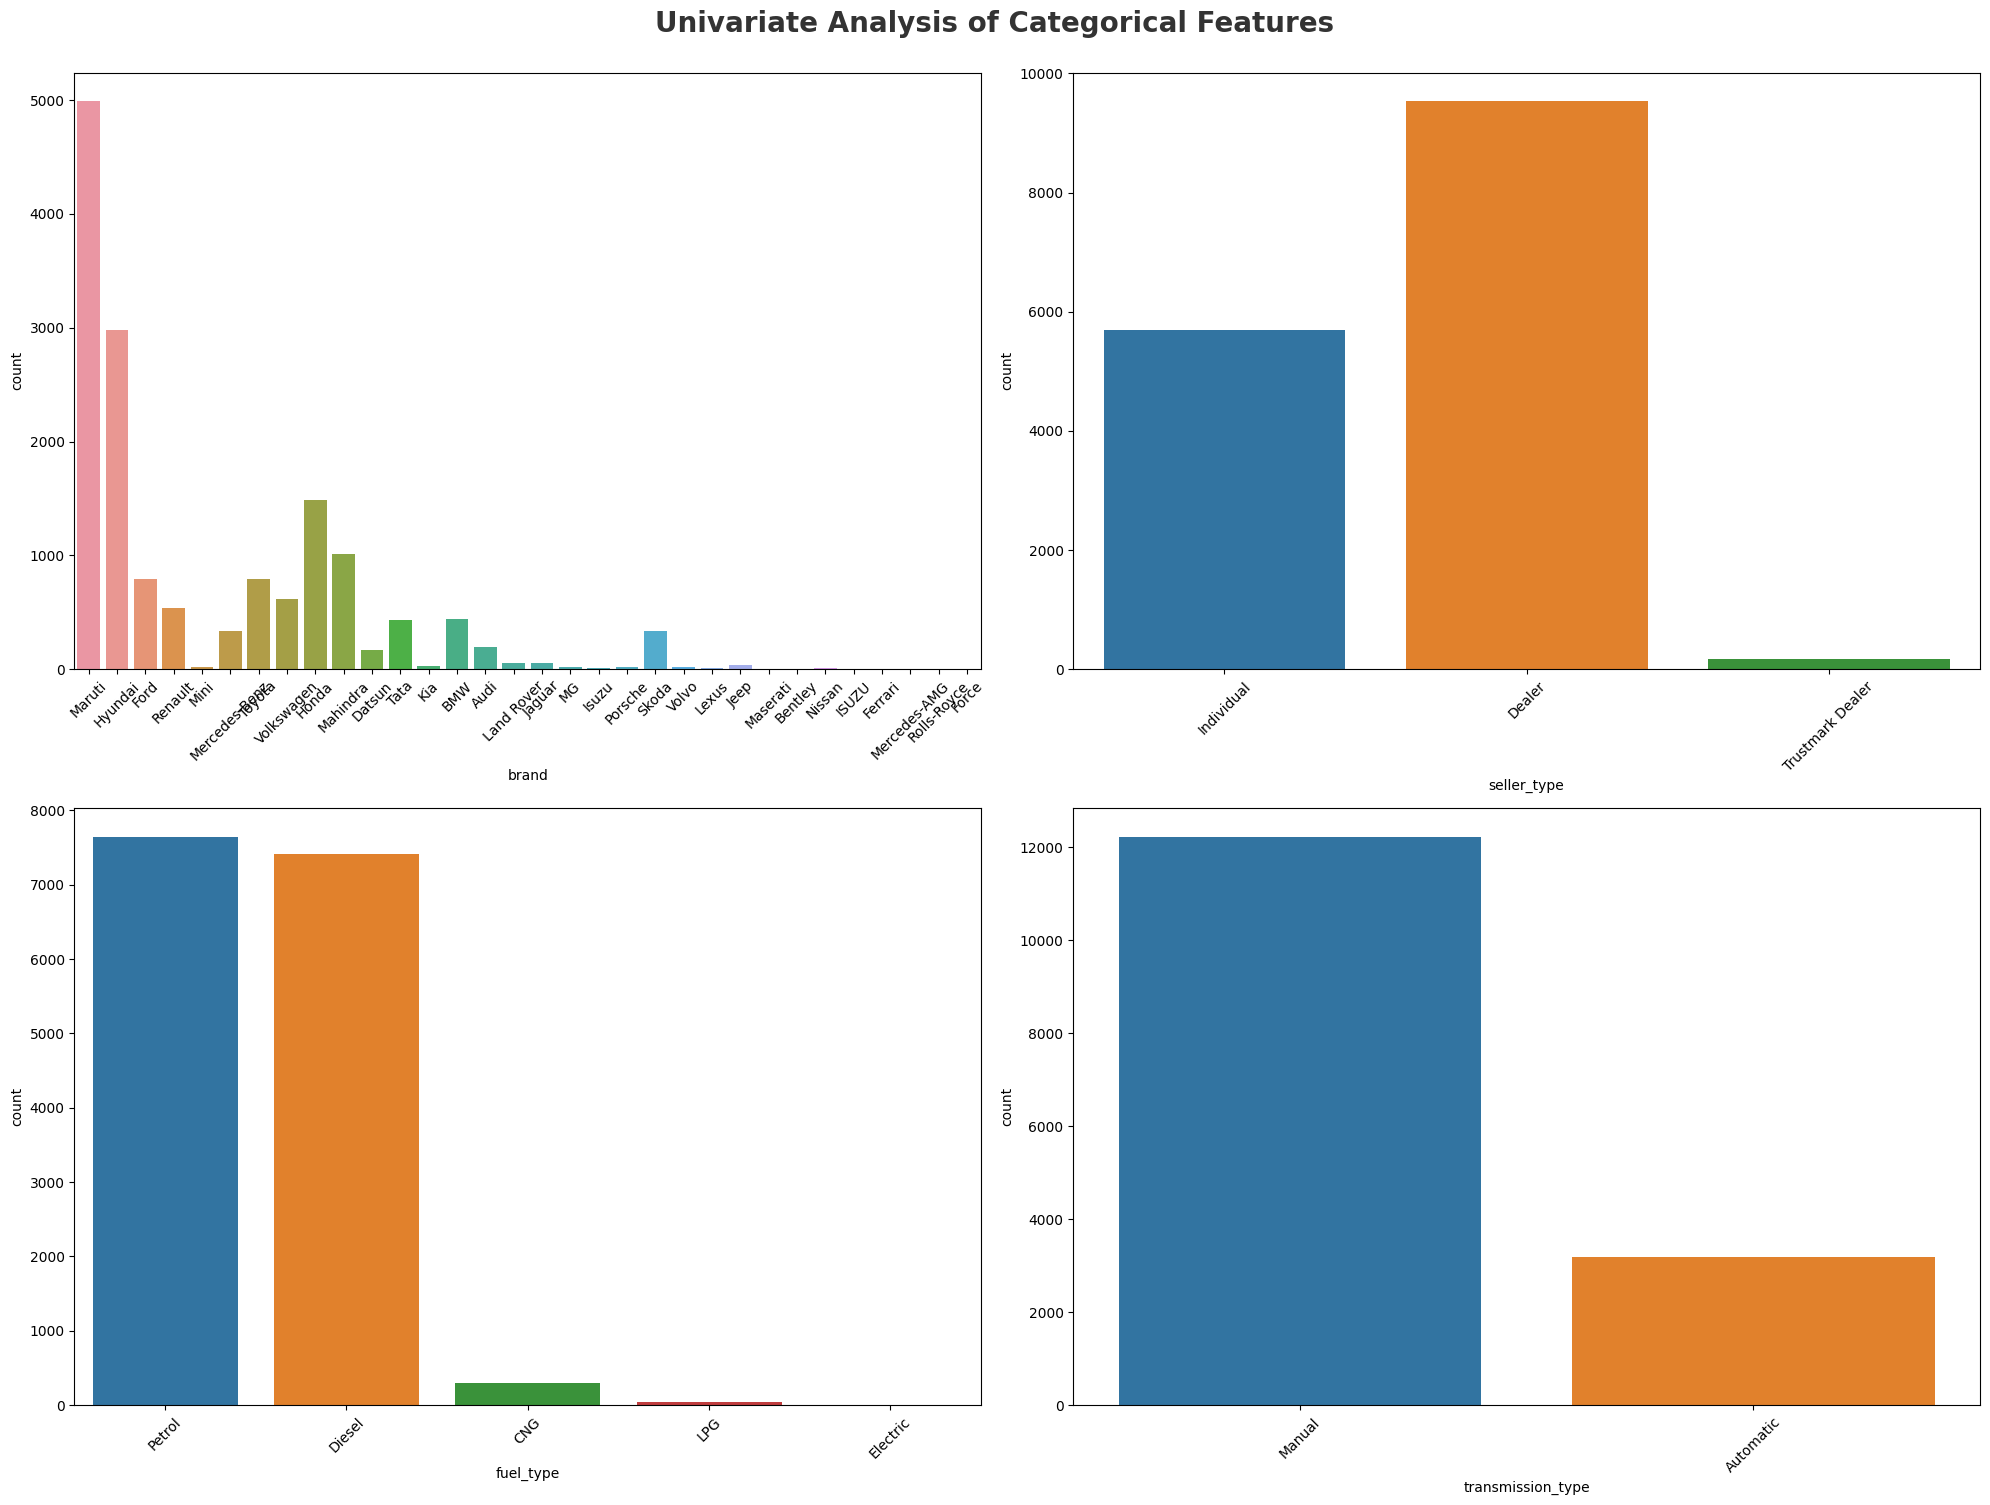

In [28]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Mutivariate analysis

check multicollinearity of variable using Heatmap

<Axes: >

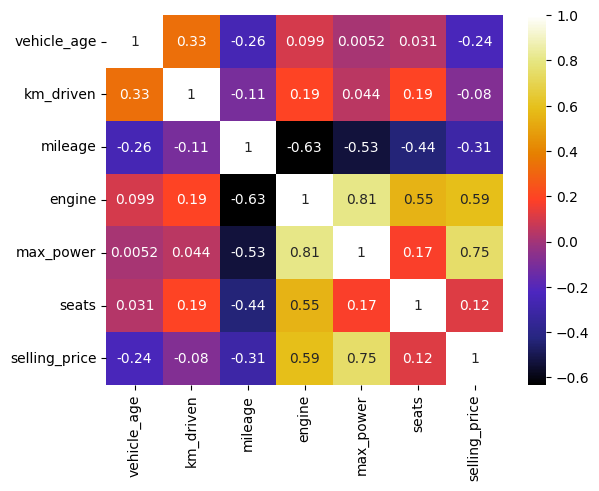

In [40]:
sns.heatmap(df[(list(numeric_features))].corr(),annot=True,cmap='CMRmap')

Report

- Our target column ProdTaken has a weak negative correlation on Age and MontlyIncome.
- The NumberOfFollowups and Passport columns also have a weak positive correlation with ProdTaken.
- The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation.

['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']